### Import thư viện và load file csv

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [91]:
df = pd.read_csv('./train.csv')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
1,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
2,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
487,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
488,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
489,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'Class'],
      dtype='object')

### Kiểm tra info data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      479 non-null    object 
 1   X2      490 non-null    object 
 2   X3      480 non-null    object 
 3   X4      491 non-null    object 
 4   X5      467 non-null    object 
 5   X6      491 non-null    int64  
 6   X7      491 non-null    object 
 7   X8      475 non-null    float64
 8   X9      479 non-null    float64
 9   X10     451 non-null    float64
 10  X11     491 non-null    object 
 11  Class   491 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 46.2+ KB


- Dữ liệu có 3 feature kiểu float, 1 feature int64, 8 feature kiểu object.
- Nhìn vào cột non null ta thấy dữ liệu có nhiều điểm NaN

### Kiểm tra số liệu thống kê

In [6]:
df.describe()

,X6,X8,X9,X10
count,491.000000,475.000000,479.000000,451.000000
mean,5502.645621,148.722105,340.283925,0.844789
std,5932.951396,87.719000,67.708849,0.362507
min,150.000000,17.000000,12.000000,0.000000
25%,2918.500000,100.000000,360.000000,1.000000
50%,3900.000000,129.000000,360.000000,1.000000
75%,5938.000000,168.000000,360.000000,1.000000
max,81000.000000,700.000000,480.000000,1.000000


- X6 lệch khá lớn 

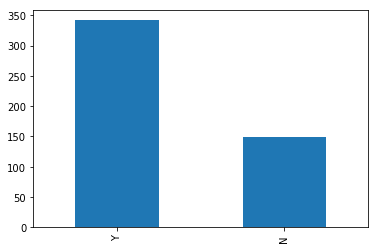

In [7]:
# visualize data
df["Class"].value_counts().plot(kind="bar")

- Dữ liệu bị mất cân bằng

### Kiểm tra giá trị thiếu

In [65]:
df1 = df.copy()

In [66]:
df1[df1 == 0] = np.nan

In [67]:
df1.isna().sum()[df1.isna().sum() > 0]

X1      12
X2       1
X3      11
X5      24
X8      16
X9      12
X10    110
dtype: int64

- Đối với các feature bị NaN, ta điền trung vị với đại lượng số và tần số cao nhất với các object

In [69]:
object = ['X1', 'X2', 'X3', 'X5']
number = ['X8', 'X9', 'X10']
for i in number:
    df1[i].fillna(df1[i].median(), inplace=True)
for i in object:
    df1[i].fillna(df1[i].value_counts().index[0], inplace=True)

In [70]:
df1.isna().sum()[df1.isna().sum() > 0]

Series([], dtype: int64)

### Kiểm tra outliers IQR

In [71]:
df2 = df1.copy()

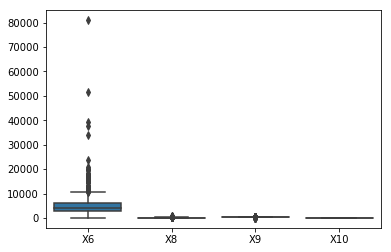

In [72]:
fig, axs = plt.subplots()
sns.boxplot(data=df2)
plt.show()

- Từ biểu đồ ta thấy được xuất hiện các ngoại lai tại X6 và loại bỏ bằng IQR

- IQR là độ trải giữa được tính dựa trên công thức IQR = Q3 - Q1
- Trong phân phối chuẩn, khoảng 99% các quan sát nằm trong khoảng mean ± 3 x σ (độ lệch chuẩn).
- Với phân phối lệch, outlier sẽ bé hơn Q1 - 1.5 * IQR hoặc lớn hơn Q3 + 1.5 * IQR. Ở phía trải rộng hơn của phân phối, chúng ta có thể thay thế 1.5 bằng 3 hoặc một con số phù hợp khác.

In [73]:
q25, q75 = np.quantile(df2['X6'], 0.25), np.quantile(df2['X6'], 0.75)
iqr = q75 - q25
lower, upper = q25 - 1.5*iqr, q75 + 3*iqr
df_iqr = df2[(df2['X6'] < upper) & (df2['X6'] > lower)]

In [74]:
df_iqr.describe()

,X6,X8,X9,X10
count,468.000000,468.000000,468.000000,468.0
mean,4561.544872,139.168803,339.692308,1.0
std,2588.178240,66.788484,68.112825,0.0
min,150.000000,17.000000,12.000000,1.0
25%,2875.250000,100.000000,360.000000,1.0
50%,3768.500000,129.000000,360.000000,1.0
75%,5653.500000,160.000000,360.000000,1.0
max,14880.000000,496.000000,480.000000,1.0


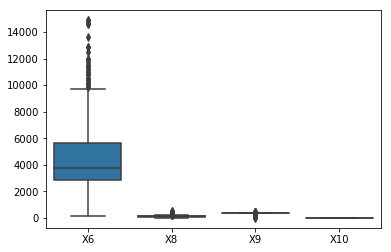

In [75]:
fig, axs = plt.subplots()
sns.boxplot(data=df_iqr)
plt.show()

In [165]:
df_iqr

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,1.0,Semiurban,N
1,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban,Y
2,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban,Y
3,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
4,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,1.0,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
486,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban,Y
487,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
488,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
489,Female,Yes,0,Graduate,No,10047,0.0,129.0,240.0,1.0,Semiurban,Y


In [167]:
df.X10.value_counts()

1.0    381
0.0     70
Name: X10, dtype: int64

### Rời rạc hóa dữ liệu và xử lý scale dữ liệu

In [175]:
df3 = df_iqr.copy()

- Ta sẽ tiến hành nhị phân hóa các dữ liệu kí tự và scale đối với dữ liệu số
- Đối với nhãn dùng LaberEncoder

In [176]:
df3.dtypes
object = ['X1','X2','X3','X4','X5','X11','X7','Class']
dummies = ['X1','X2','X3','X4','X5','X11','X7']
number = ['X6','X8','X9','X10']

In [177]:
df_number = df3.drop(object, axis = 1)
scale = StandardScaler()
df_scale = scale.fit_transform(df_number)
df_scale = pd.DataFrame(df_scale, columns = number)

df4 = df3.drop(number, axis=1)
df4 = pd.DataFrame(df4.values, columns = df4.columns)
df4 = pd.get_dummies(df4, columns = dummies)
df4[number] = df_scale[number]
df4

,Class,X1_Female,X1_Male,X2_No,X2_Yes,X3_0,X3_1,X3_2,X3_3+,X4_Graduate,...,X7_8980.0,X7_9.857.999.878,X7_913.0,X7_923.0,X7_983.0,X7_997.0,X6,X8,X9,X10
0,N,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0.556374,1.886041,0.298467,0.0
1,Y,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,-0.620228,-0.122439,0.298467,0.0
2,Y,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0.653070,1.061665,0.298467,0.0
3,Y,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,-0.958665,-0.167405,0.298467,0.0
4,N,0,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,-0.152991,-0.617065,0.298467,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Y,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,-1.039117,-0.632054,0.298467,0.0
464,Y,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,2.651591,1.286495,0.298467,0.0
465,Y,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,-0.512315,-1.636294,0.298467,0.0
466,Y,1,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,2.121695,-0.152417,-1.465201,0.0


### Feature Selection PCA

In [178]:
df5 = df4.copy()

In [180]:
x = df5.drop(['Class'], axis = 1)
y = df5.Class
x.shape, y.shape

((468, 251), (468,))

In [182]:
pca = PCA(n_components=15)
x_pca = pca.fit_transform(x)

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((374, 15), (374,), (94, 15), (94,))

### Training Model

In [185]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='weighted')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='weighted')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='weighted')
print('F1 score: %f' % f1)
print(classification_report(y_test_label, y_pred))